Trong python, việc khai triển kỳ dị của một ma trận được thực hiện dễ dàng 
thông qua việc sử dụng 
hàm SVD của package scipy như sau

In [ ]:
import scipy.linalg as ln
import numpy as np
m, n = 2, 3
n_diag = min(m, n)
#Tạo một ma trận ngẫu nhiên cỡ mxn
A = np.random.rand(m, n)
U, S_diag, V = ln.svd(A)

#Tạo một ma trận đường chéo S
S = np.zeros((n_diag, n_diag))
np.fill_diagonal(S, S_diag)
if m > n:
    S = np.concatenate((S, np.zeros((1, n))), axis = 0)
elif m < n:
    S = np.concatenate((S, np.zeros((m, 1))), axis = 1)
        
print('Ma tran A: \n %s \n'%A)
print('Ma tran truc giao U: \n %s \n'%U)
print('Check Frobenius U^TU-I: \n %s \n'%ln.norm(np.dot(U.T,U)-np.eye(m, m), 'fro'))
print('Ma tran truc giao V: \n %s \n'%V)
print('Check Frobenius V^TV-I: \n %s \n'%ln.norm(np.dot(V.T,V)-np.eye(n, n), 'fro'))
print('Ma tran duong cheo S: \n %s \n'%S_diag)
print('Ma tran S: \n %s \n'%S)
print('Check Frobenius U.S.V - A: \n %s \n'%ln.norm(np.dot(U, S.dot(V))-A,'fro'))


Giải phương trình tuyến tính 

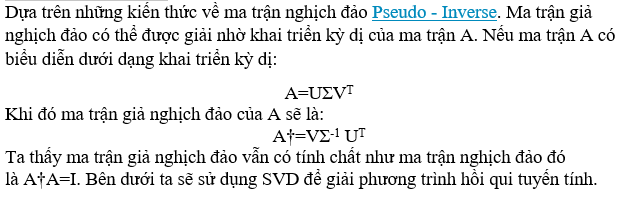

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = np.arange(n)

X = np.concatenate((x.reshape(n, 1), np.ones((n, 1))), axis = 1)
y = np.random.randn(n)*10 + 2*x
plt.plot(x, y)

In [ ]:
# Tính ma trận A, b
A = np.dot(X.T, X)
b = np.dot(X.T, y)

# Phân tích SVD
U, S_diag, V = np.linalg.svd(A)
S = np.zeros((S_diag.shape[0], S_diag.shape[0]))
np.fill_diagonal(S, S_diag)
S_inv = np.linalg.inv(S)

# Pseudo - inverse matrix
A_pse =  np.dot(V.T, np.dot(S_inv, U))

# Hệ số ước tính
w_svd = np.dot(A_pse, b)
print('w Giá trị nhận được từ SVD: %s' %str(w_svd))

In [ ]:
#@title
from sklearn import linear_model
ln_reg = linear_model.LinearRegression(fit_intercept = False)
ln_reg.fit(X, y)
print('w calculated from sklearn: %s' %str(ln_reg.coef_))

Nén Ảnh

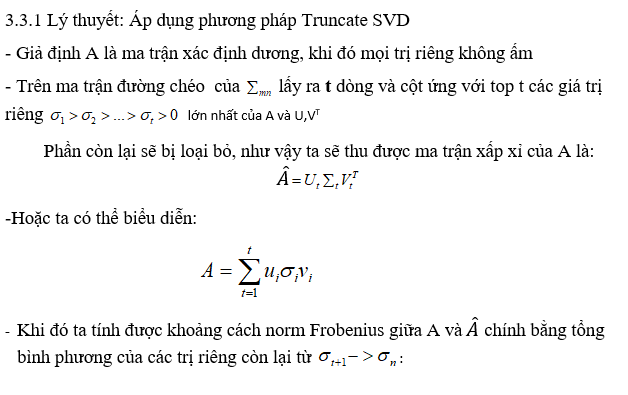

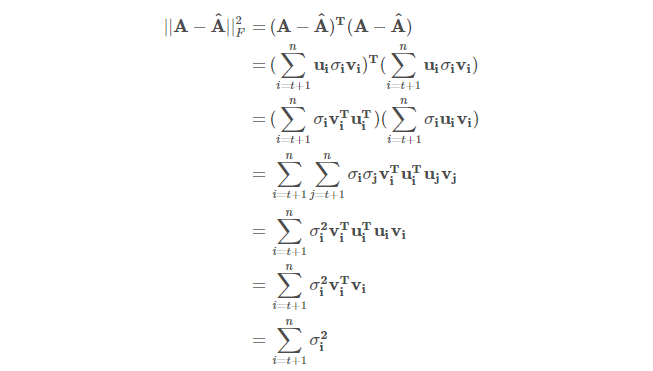

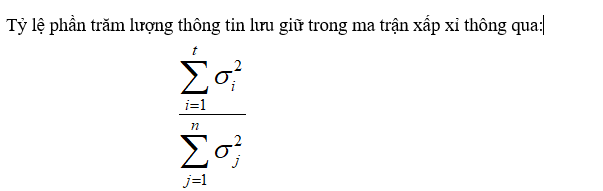

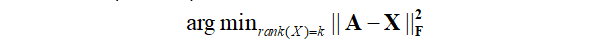

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as ln
from PIL import Image
import urllib.request
from io import BytesIO

%matplotlib inline

url = str('https://cdn.baogiaothong.vn/upload/images/2021-2/article_img/2021-05-17/img-bgt-2021-phuong-hang-1-1621248851-width800height500.jpeg')
with urllib.request.urlopen(url) as url:
    f = BytesIO(url.read())

ig = np.array(Image.open(f))
print('Hinh anh: %s'%str(ig.shape))
# Chuyển sang màu xám
ig = ig.dot([0.299, 0.5870, 0.114])
plt.imshow(ig)

In [ ]:
def SVD_pic(n_evl):
    """
    n_evl: number of highest eigenvalues taken
    """
    #Xác định kích thước
    m = ig.shape[0]
    n = ig.shape[1]
    #Singular Value Decomposition
    U, S, V = ln.svd(ig) 
    #Xác định vị trí id của n giá trị riêng cao nhất
    id_trunc = np.argsort(S)[::-1][:n_evl]
    #Extract matrix U_t, V_t, S_t
    U_t = U[np.ix_(np.arange(m), id_trunc)]
    V_t = V[np.ix_(id_trunc, np.arange(n))]
    S_diag = S[id_trunc]
    S_t = np.zeros((n_evl, n_evl))
    np.fill_diagonal(S_t, S_diag)
    #Return picture
    A = np.dot(U_t, S_t.dot(V_t))
    #Norm Frobenius
    fb = ln.norm(A-ig, 'fro')
    prt_retain = (1-fb**2/np.sum(S**2))*100
    plt.imshow(A)
    print('Tỉ lệ thông tin ảnh được giữ lại : %.2f%s \n'%(prt_retain, '%'))

In [ ]:
SVD_pic(10)

In [ ]:
SVD_pic(20)

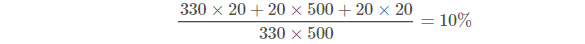

Ứng dụng của SVD trong phân tích quang phổ


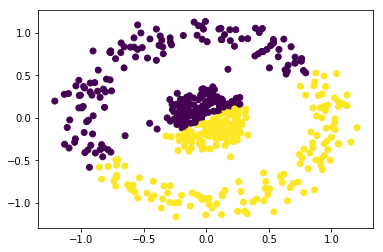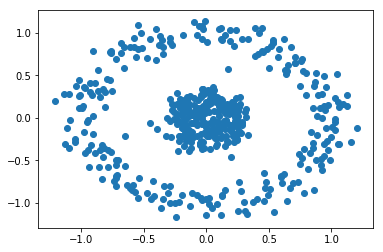

In [ ]:
# import required functions and libraries
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# generate your data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# plot your data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# train and predict
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X)
        
# plot clustered data
plt.scatter(X[:, 0], X[:, 1], c = s_cluster)
plt.show()


Nén Âm Thanh bằng hình ảnh


Trích Audio compression via images
By artstein2017


"The technique that is used for image compression is called singular value decomposition. A good application of SVD and a demo for images is here​​​.

We demonstrate an image-based compression of audio files. To convert sound into images we use Short-time Fourier transform (STFT) and its inverse, both from the python audio package librosa. STFT yields a complex two dimensional matrix which can be inverted to obtain the original audio signal. This complex STFT “image” can be separated two “images”, into real and complex parts. These can be compressed, recombined and subsequently inverted to yield the compressed audio image.

The SVD method is not as efficient as an image compression method as specialised SOTA techniques such as JPEG. The point here is to move the compression from one domain to another, ie from audio to images. It might however be worthwhile, and could turn into another post, to compare the efficiency of

SOTA Audio compression vs
STFT -> SOTA Image compression > Inverse STFT
The bird’s eye view of the presented material is as follows:

Intro image compression demo : Compress colored photo image by splitting it into RGB (red, green and brown) images
Audio compression demo: Compress audio by converting the sound into an RC (real and imaginary) image and then convert the compressed RC image back again"
